In [1]:
# 1) Importer librairies et dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier Excel
df = pd.read_excel('../data/raw/TCRD_025.xlsx', skiprows=4)  # On saute les lignes d'entête inutiles
df.head()

,01,Ain,5.7,5.6,5.5
0,02,Aisne,10.3,10.2,10.4
1,03,Allier,8.0,7.8,7.9
2,04,Alpes-de-Haute-Provence,8.0,7.9,8.0
3,05,Hautes-Alpes,6.5,6.4,6.2
4,06,Alpes-Maritimes,7.0,6.9,6.6


In [3]:
# 2) Renommer les colonnes

# Actuellement, le fichier semble avoir des colonnes comme :
# Unnamed: 0, Ain, 3ᵉ trim. 2025 (p), 2ᵉ trim. 2025, 3ᵉ trim. 2024

# On peut les renommer pour plus de clarté :
# 'Code_Departement', 'Departement', 'Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024'

df.columns = ['Code_Departement', 'Departement', 'Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024']
df.head()

,Code_Departement,Departement,Taux_T3_2025,Taux_T2_2025,Taux_T3_2024
0,02,Aisne,10.3,10.2,10.4
1,03,Allier,8.0,7.8,7.9
2,04,Alpes-de-Haute-Provence,8.0,7.9,8.0
3,05,Hautes-Alpes,6.5,6.4,6.2
4,06,Alpes-Maritimes,7.0,6.9,6.6


In [4]:
# 3) Convertir les valeurs en numériques

# Les taux sont souvent lus comme texte avec des virgules. Il faut convertir en float :

for col in ['Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df.head()

,Code_Departement,Departement,Taux_T3_2025,Taux_T2_2025,Taux_T3_2024
0,02,Aisne,10.3,10.2,10.4
1,03,Allier,8.0,7.8,7.9
2,04,Alpes-de-Haute-Provence,8.0,7.9,8.0
3,05,Hautes-Alpes,6.5,6.4,6.2
4,06,Alpes-Maritimes,7.0,6.9,6.6


In [5]:
# 4) Nettoyer les lignes inutiles

# Vérifie si le fichier a des lignes vides ou totaux en bas et les supprime :

df = df.dropna(subset=['Departement'])

<Figure size 1200x600 with 0 Axes>

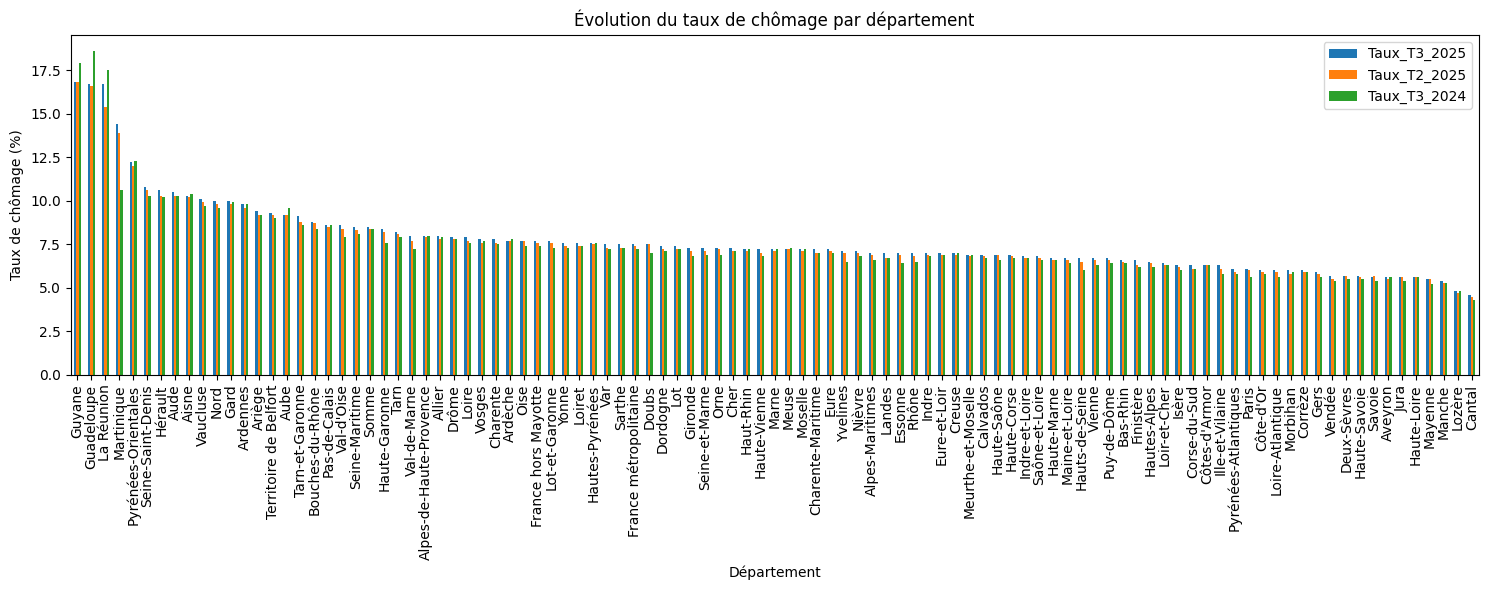

In [6]:
# 5) Analyses simples

# Comparaison entre trimestres

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df.sort_values('Taux_T3_2025', ascending=False).plot(
    x='Departement',
    y=['Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024'],
    kind='bar',
    figsize=(15,6)
)
plt.title("Évolution du taux de chômage par département")
plt.ylabel("Taux de chômage (%)")
plt.xlabel("Département")
plt.tight_layout()
plt.show()

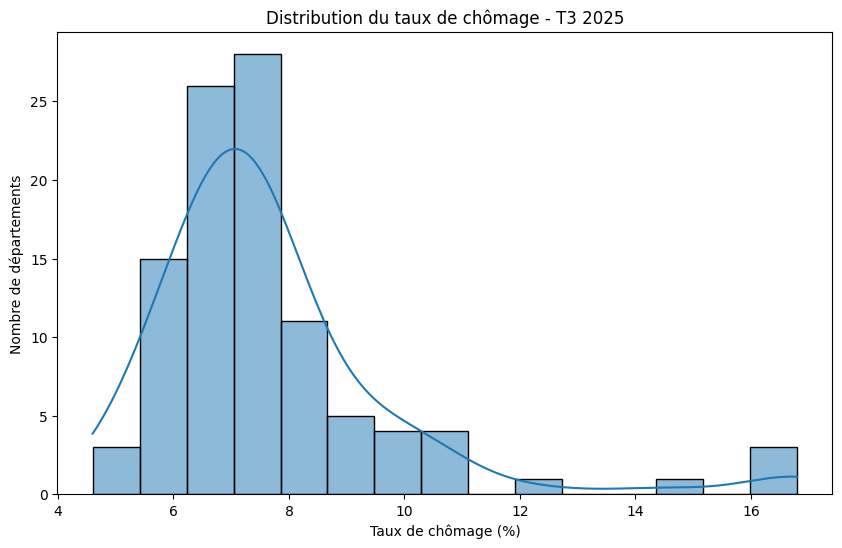

In [7]:
# Histogramme du taux de chômage T3 2025

plt.figure(figsize=(10,6))
sns.histplot(df['Taux_T3_2025'], bins=15, kde=True)
plt.title("Distribution du taux de chômage - T3 2025")
plt.xlabel("Taux de chômage (%)")
plt.ylabel("Nombre de départements")
plt.show()

Statistiques descriptives :


,Taux_T3_2025,Taux_T2_2025,Taux_T3_2024
count,101.000000,101.000000,101.000000
mean,7.722772,7.578218,7.488119
std,2.203038,2.136240,2.331707
min,4.600000,4.500000,4.300000
25%,6.600000,6.500000,6.300000
50%,7.200000,7.100000,7.000000
75%,8.000000,7.800000,7.800000
max,16.800000,16.800000,18.600000


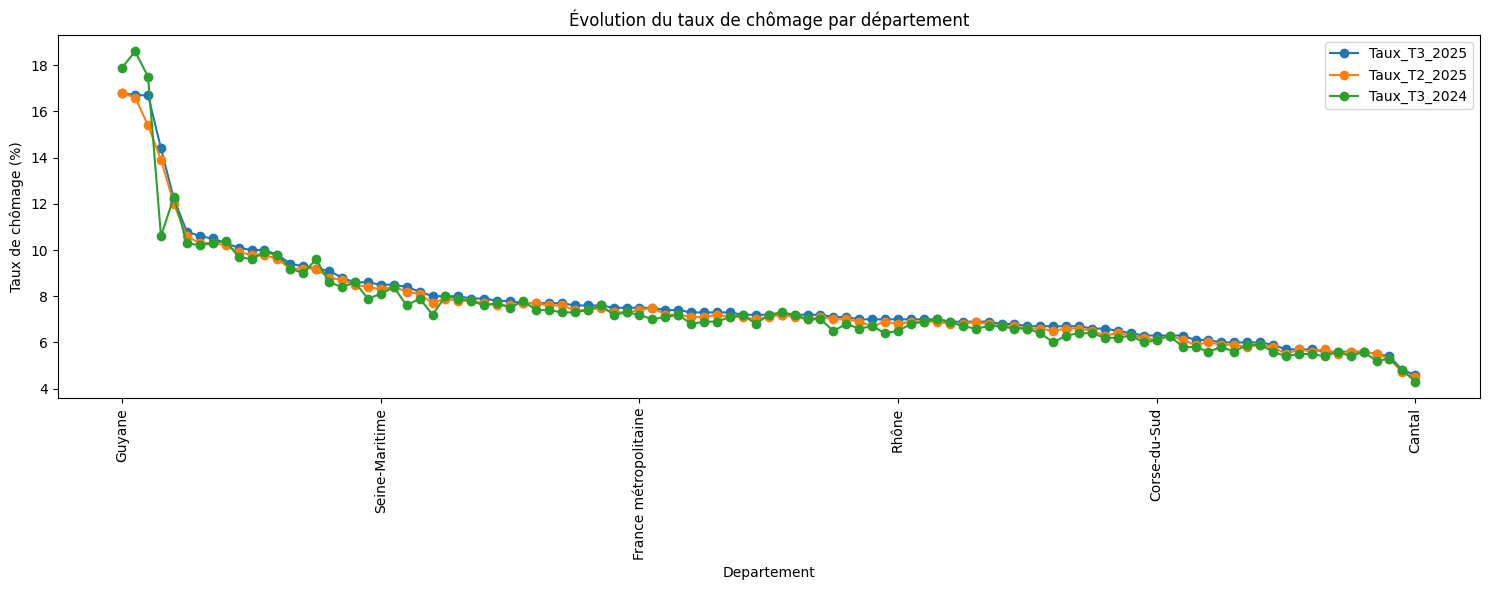

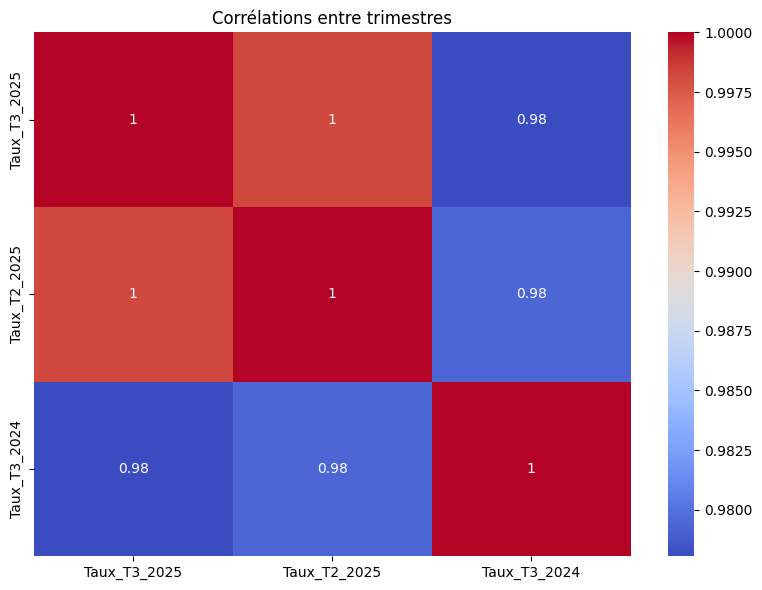

In [9]:
# 6) Analyse exploratoire

import os

# Créer le dossier visuals s'il n'existe pas
os.makedirs('../data/visuals', exist_ok=True)


# a) Statistiques descriptives
print("Statistiques descriptives :")
display(df.describe())

# b) Évolution par département entre trimestres
df_sorted = df.sort_values('Taux_T3_2025', ascending=False)
df_sorted.plot(
    x='Departement',
    y=['Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024'],
    kind='line',
    marker='o',
    figsize=(15, 6)
)
plt.xticks(rotation=90)
plt.ylabel("Taux de chômage (%)")
plt.title("Évolution du taux de chômage par département")
plt.tight_layout()
plt.savefig('../data/visuals/taux_chomage_evolution.png')
plt.show()

# c) Heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Taux_T3_2025', 'Taux_T2_2025', 'Taux_T3_2024']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre trimestres")
plt.tight_layout()
plt.savefig('../data/visuals/correlation_heatmap.png')
plt.show()



In [ ]:
# 7) Insights / Conclusion

"""
Insights possibles :
- La Guyane, la Guadeloupe et la Réunion ont un taux de chômage supérieur à la moyenne nationale.
- Le Cantal, la Lozère et la Manche sont en dessous de la moyenne.
- L’évolution trimestrielle montre quelles zones s'améliorent ou se dégradent.
- Ces données permettent d'identifier les départements à surveiller ou nécessitant des mesures d'accompagnement.
"""

"\n💡 Insights possibles :\n- La Guyane, la Guadeloupe et la Réunion ont un taux de chômage supérieur à la moyenne nationale.\n- Le Cantal, la Lozère et la Manche sont en dessous de la moyenne.\n- L’évolution trimestrielle montre quelles zones s'améliorent ou se dégradent.\n- Ces données permettent d'identifier les départements à surveiller ou nécessitant des mesures d'accompagnement.\n"

In [ ]:
# 8) Exporter le dataset nettoyé

df.to_csv('../data/cleaned/chomage_departements_clean.csv', index=False)